In [6]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [362]:
df = pd.read_csv('dataset/dados_monte_alegre.csv', delimiter=';')

In [363]:
print("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (48777, 11)


,Estacao,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,Unnamed: 10
0,82181,01/04/1974,1200,24.5,22.8,87.0,996.3,5.0,3.0,0.8,NaN
1,82181,01/04/1974,1800,29.5,24.5,67.0,994.2,14.0,3.0,0.7,NaN
2,82181,02/04/1974,0,25.0,23.8,91.0,993.0,0.0,0.0,0.7,NaN
3,82181,02/04/1974,1200,24.9,23.2,87.0,994.6,32.0,1.0,0.8,NaN
4,82181,02/04/1974,1800,29.0,25.3,74.0,992.8,23.0,3.0,0.7,NaN


In [364]:
df[['day','month','year']] = df.Data.str.split('/', n = 3, expand = True)
df['day'] = pd.to_numeric(df.day)
df['month'] = pd.to_numeric(df.month)
df['year'] = pd.to_numeric(df.year)
df = df.replace([1200,1800],[12,18])

df['datetime'] = df[['day','month','year','Hora']].apply(lambda row:
                    datetime.datetime(year=row['year'], month=row['month'],day=row['day'],hour=row['Hora']),axis=1)
df = df.drop(columns=['Data','Hora','day','month','year','Unnamed: 10'])
df = df.set_index('datetime')
df.sort_values('datetime',ascending=True,inplace=True)
df.head()

,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
datetime,,,,,,,,
1974-04-01 12:00:00,82181,24.5,22.8,87.0,996.3,5.0,3.0,0.8
1974-04-01 18:00:00,82181,29.5,24.5,67.0,994.2,14.0,3.0,0.7
1974-04-02 00:00:00,82181,25.0,23.8,91.0,993.0,0.0,0.0,0.7
1974-04-02 12:00:00,82181,24.9,23.2,87.0,994.6,32.0,1.0,0.8
1974-04-02 18:00:00,82181,29.0,25.3,74.0,992.8,23.0,3.0,0.7


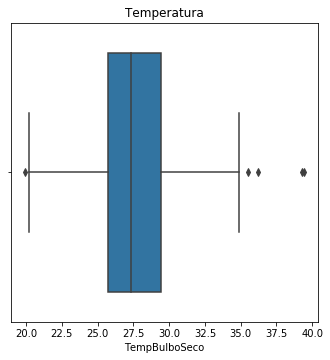

In [365]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['TempBulboSeco'])
g.set_title('Temperatura')
plt.show()

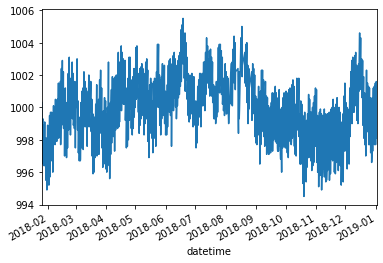

In [627]:
df_train.PressaoAtmEstacao.plot()

In [623]:
split_date = datetime.datetime(year=2018, month=1,day=25)
df_train = df.loc[df.index>split_date]
df_train

,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,Scaled_TempBulboSeco
datetime,,,,,,,,,
2018-01-25 12:00:00,82181,24.6,23.8,92.0,1000.3,2.0,3.6,10.0,0.241026
2018-01-25 18:00:00,82181,25.9,24.2,86.0,998.0,36.0,2.6,10.0,0.307692
2018-01-26 00:00:00,82181,24.9,23.6,89.0,998.7,36.0,1.6,10.0,0.256410
2018-01-26 12:00:00,82181,25.7,24.6,90.0,999.3,36.0,3.0,9.0,0.297436
2018-01-26 18:00:00,82181,31.0,25.8,63.0,996.5,5.0,3.3,6.0,0.569231
...,...,...,...,...,...,...,...,...,...
2018-12-31 12:00:00,82181,24.4,23.6,93.0,1001.5,0.0,0.0,10.0,0.230769
2018-12-31 18:00:00,82181,28.7,25.4,74.0,997.7,7.0,1.6,8.0,0.451282
2019-01-01 00:00:00,82181,26.6,24.4,83.0,999.4,0.0,0.0,6.0,0.343590


datetime
1974-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
1974-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
1974-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
1974-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
1974-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
2018-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2018-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2018-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2018-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
Length: 538, dtype: object

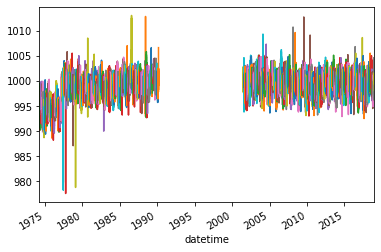

In [609]:
df.PressaoAtmEstacao.resample('M').plot()

/ssd/miniconda3/envs/cap351/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


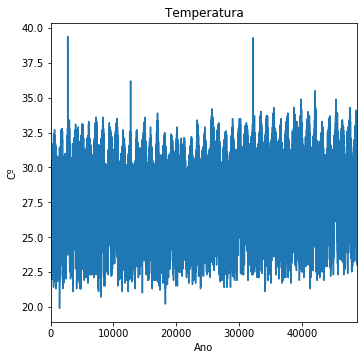

In [366]:
plt.figure(figsize=(5.5,5.5))
g = sns.tsplot(df['TempBulboSeco'])
g.set_title('Temperatura')
g.set_xlabel('Ano')
g.set_ylabel('Cº')
plt.show()

In [367]:
print('Shape of dataset: ',df.TempBulboSeco.shape)

Shape of dataset:  (48777,)


In [580]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df['Scaled_TempBulboSeco'] = scaler.fit_transform(np.array(df['TempBulboSeco']).reshape(-1,1))
df.head()

,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,Scaled_TempBulboSeco
datetime,,,,,,,,,
1974-04-01 12:00:00,82181,24.5,22.8,87.0,996.3,5.0,3.0,0.8,0.235897
1974-04-01 18:00:00,82181,29.5,24.5,67.0,994.2,14.0,3.0,0.7,0.492308
1974-04-02 00:00:00,82181,25.0,23.8,91.0,993.0,0.0,0.0,0.7,0.261538
1974-04-02 12:00:00,82181,24.9,23.2,87.0,994.6,32.0,1.0,0.8,0.256410
1974-04-02 18:00:00,82181,29.0,25.3,74.0,992.8,23.0,3.0,0.7,0.466667


In [581]:
## Separar dados de treinamento
split_date = datetime.datetime(year=2014, month=1,day=1)

df_train = df.loc[df.index<split_date]
df_val = df.loc[df.index>=split_date]

df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)

print('Shape do treinamento: ', df_train.shape)
print('Shape da validação: ', df_val.shape)
df_train.head()

Shape do treinamento:  (43323, 10)
Shape da validação:  (5454, 10)


,datetime,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,Scaled_TempBulboSeco
0,1974-04-01 12:00:00,82181,24.5,22.8,87.0,996.3,5.0,3.0,0.8,0.235897
1,1974-04-01 18:00:00,82181,29.5,24.5,67.0,994.2,14.0,3.0,0.7,0.492308
2,1974-04-02 00:00:00,82181,25.0,23.8,91.0,993.0,0.0,0.0,0.7,0.261538
3,1974-04-02 12:00:00,82181,24.9,23.2,87.0,994.6,32.0,1.0,0.8,0.256410
4,1974-04-02 18:00:00,82181,29.0,25.3,74.0,992.8,23.0,3.0,0.7,0.466667


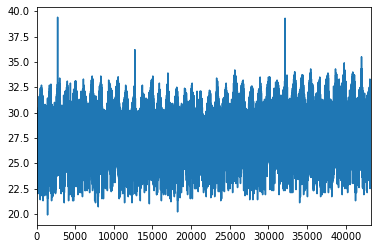

In [464]:
df_train.TempBulboSeco.plot()

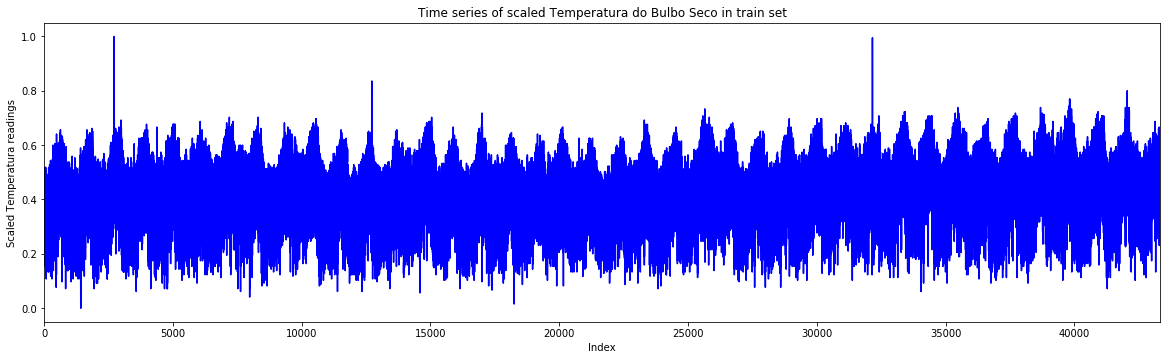

In [465]:
plt.figure(figsize=(20, 5.5))
g = sns.tsplot(df_train['Scaled_TempBulboSeco'], color='b')
g.set_title('Time series of scaled Temperatura do Bulbo Seco in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Temperatura readings')
plt.show()

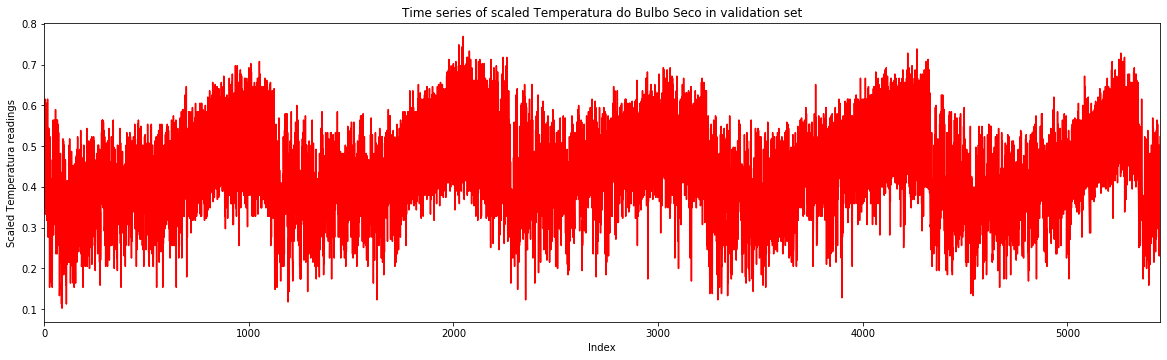

In [466]:
plt.figure(figsize=(20, 5.5))
g = sns.tsplot(df_val['Scaled_TempBulboSeco'], color='r')
g.set_title('Time series of scaled Temperatura do Bulbo Seco in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Temperatura readings')
plt.show()

In [540]:
def makeYx(ts, nb_timesteps):
    
    X = []
    y = []
    
    for i in range(nb_timesteps, ts.shape[0]):

        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
        
    X,y = np.array(X), np.array(y)
    return X,y

In [544]:
df_train

,datetime,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,Scaled_TempBulboSeco
0,1974-04-01 12:00:00,82181,24.5,22.8,87.0,996.3,5.0,3.0,0.8,0.235897
1,1974-04-01 18:00:00,82181,29.5,24.5,67.0,994.2,14.0,3.0,0.7,0.492308
2,1974-04-02 00:00:00,82181,25.0,23.8,91.0,993.0,0.0,0.0,0.7,0.261538
3,1974-04-02 12:00:00,82181,24.9,23.2,87.0,994.6,32.0,1.0,0.8,0.256410
4,1974-04-02 18:00:00,82181,29.0,25.3,74.0,992.8,23.0,3.0,0.7,0.466667
...,...,...,...,...,...,...,...,...,...,...
43318,2013-12-30 12:00:00,82181,27.0,24.7,81.0,999.4,2.0,5.0,8.0,0.364103
43319,2013-12-30 18:00:00,82181,31.0,25.6,62.0,996.5,7.0,4.6,8.0,0.569231
43320,2013-12-31 00:00:00,82181,28.2,25.0,75.0,997.7,5.0,3.3,8.0,0.425641
43321,2013-12-31 12:00:00,82181,25.7,23.3,79.0,1000.0,5.0,5.0,7.0,0.297436


In [561]:
X_train, y_train = makeYx(df_train['Scaled_TempBulboSeco'], 7)
print('Shape of train arrays: ', X_train.shape, y_train.shape)

Shape of train arrays:  (43316, 7) (43316,)


In [566]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

In [569]:
X_val, y_val = makeYx(df_val['Scaled_TempBulboSeco'], 7)
print('Shape of val arrays: ', X_val.shape, y_val.shape)

Shape of val arrays:  (5447, 7) (5447,)


In [570]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [571]:
# indicates the number of instances that's determined at runtime
input_layer = Input(shape=(7,),dtype='float32')

In [572]:
# dense layer are declared with linear activation
dense1 = Dense(32, activation = 'linear')(input_layer)
dense2 = Dense(16, activation = 'linear')(dense1)
dense3 = Dense(16, activation = 'linear')(dense2)

In [573]:
# dropout has been used to regularize deep neural network, for this example, 
# dropout layer is added before the output layer
# Dropout randomly set Spee fraction of input neurns to zero before passing to the next layer.
# randomly dropping inputs essentially acts as bootstrap aggregating or bagging type of model ensemble
# random forests uses bagging by building trees on random subsets of input features


# 20% of randomly selected input features
dropout_layer = Dropout(0.2)(dense3)

In [574]:
# the output layer gives prediction for the next day air pressure
output_layer = Dense(1, activation='linear')(dropout_layer)

In [575]:
# the input dents and out put layer will now be packed inside a model wich is the rapper class to train and make
# predictions

# Mean squared error (MSE) is used as the loss function 
# the code learning rate of a weights is updated on exponentially weighted moving averages
# of the weights gratients and the squared gradient

# The Summary functions display layer wise details such as the 
# - shape of input and output
# - number of trainable weights

ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error',optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [576]:
# a model checkpoint object tracks loss function on the validation dataset, and saves for the epoch out wich loss
# function is minimum
save_weights_at = os.path.join('dataset','PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss',verbose=1,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)

In [629]:
# Fit function
ts_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 43316 samples, validate on 5447 samples
Epoch 1/20
43316/43316 [==============================] - 5s 126us/step - loss: 0.0041 - val_loss: 0.0038

Epoch 00001: val_loss did not improve from 0.00373
Epoch 2/20
43316/43316 [==============================] - 6s 130us/step - loss: 0.0041 - val_loss: 0.0037

Epoch 00002: val_loss did not improve from 0.00373
Epoch 3/20
43316/43316 [==============================] - 5s 113us/step - loss: 0.0041 - val_loss: 0.0039

Epoch 00003: val_loss did not improve from 0.00373
Epoch 4/20
43316/43316 [==============================] - 5s 124us/step - loss: 0.0041 - val_loss: 0.0039

Epoch 00004: val_loss did not improve from 0.00373
Epoch 5/20
43316/43316 [==============================] - 6s 134us/step - loss: 0.0041 - val_loss: 0.0038

Epoch 00005: val_loss did not improve from 0.00373
Epoch 6/20
43316/43316 [==============================] - 5s 123us/step - loss: 0.0041 - val_loss: 0.0038

Epoch 00006: val_loss did not improve from 0.00373
Epo

In [582]:
best_model = load_model(os.path.join('dataset', 'PRSA_data_2010.1.1-2014.12.31.02-0.0037.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [585]:
from sklearn.metrics import r2_score

In [587]:
r2 = r2_score(df_val['Scaled_TempBulboSeco'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: -50908.2865


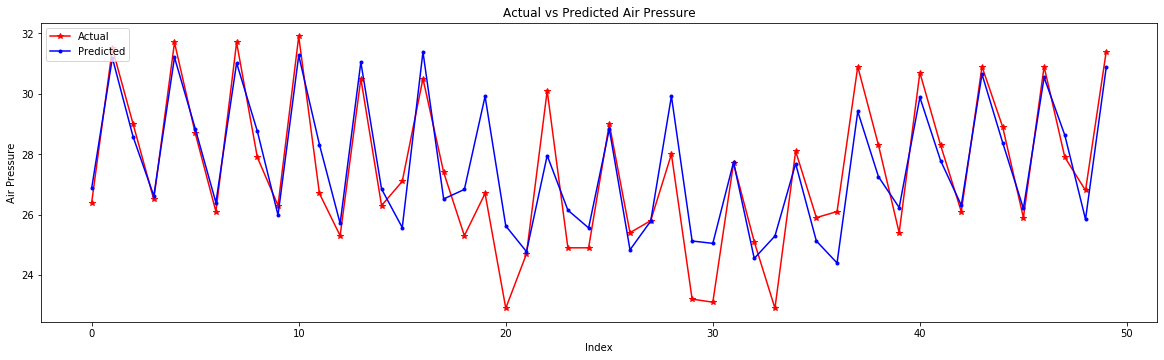

In [599]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(20, 5.5))
plt.plot(range(50), df_val['TempBulboSeco'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
plt.show()

In [606]:
pred_PRES.shape

(5447,)